### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [26]:
import pandas as pd

dados = pd.read_csv("diabetes.csv")

x = dados.drop(columns=['diabetes'])
y = dados['diabetes']

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [29]:
from sklearn.model_selection import train_test_split

x_1, x_teste, y_1, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)

x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, stratify = y_1, random_state = 5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)

tree.score(x_val, y_val)

0.6063829787234043

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, max_depth=10)
forest.fit(x_train, y_train)

forest.score(x_val, y_val)

0.6702127659574468

### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

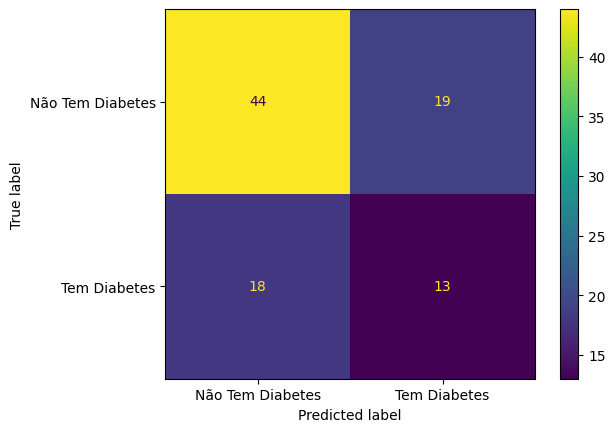

In [33]:
treeDisplay = ConfusionMatrixDisplay(confusion_matrix(y_val, tree.predict(x_val)), display_labels=["Não Tem Diabetes", "Tem Diabetes"])
treeDisplay.plot()

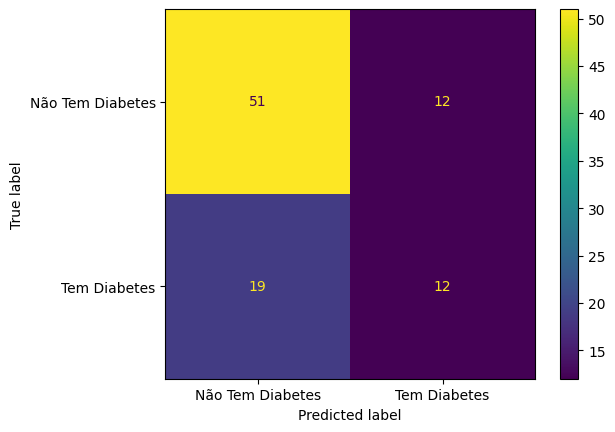

In [34]:
forestDisplay = ConfusionMatrixDisplay(confusion_matrix(y_val, forest.predict(x_val)), display_labels=["Não Tem Diabetes", "Tem Diabetes"])
forestDisplay.plot()

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.